# Bias In Ai

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../raw_data/kc_house_data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

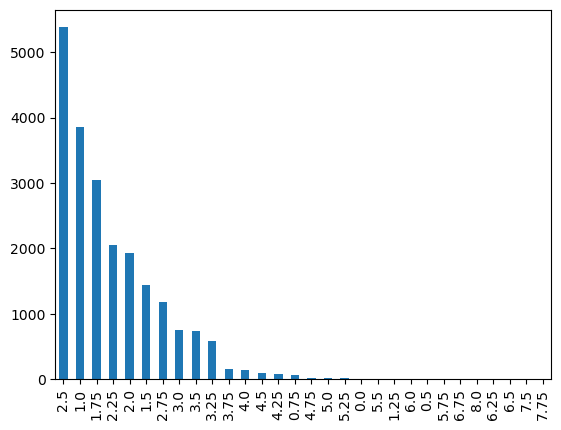

In [5]:
count = df['bathrooms']
count.value_counts().plot(kind='bar');

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Unfortunately, race is a column that is not available in this version of the dataset at this time.

In [12]:
df.groupby(['zipcode']).size()

zipcode
98001    362
98002    199
98003    280
98004    317
98005    168
        ... 
98177    255
98178    262
98188    136
98198    280
98199    317
Length: 70, dtype: int64

In [7]:
zips = df[df['zipcode'] == 98178].groupby('zipcode')
zips.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
117,4060000240,20140623T000000,205425.0,2,1.00,880,6780,1.0,0,0,...,6,880,0,1945,0,98178,47.5009,-122.248,1190,6780
126,4058801670,20140717T000000,445000.0,3,2.25,2100,8201,1.0,0,2,...,8,1620,480,1967,0,98178,47.5091,-122.244,2660,8712
273,2976800796,20140925T000000,236000.0,3,1.00,1300,5898,1.0,0,0,...,7,1300,0,1961,0,98178,47.5053,-122.255,1320,7619
281,6874200960,20150227T000000,170000.0,2,1.00,860,5265,1.0,0,0,...,6,860,0,1931,0,98178,47.5048,-122.272,1650,8775


In [8]:
count = df['zipcode']
df.sort_values(by='zipcode', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12236,1025039320,20150427T000000,1305000.0,4,3.50,3440,5000,2.0,0,0,...,11,2560,880,2006,0,98199,47.6672,-122.409,3090,10241
16293,5037300130,20150504T000000,672500.0,3,1.75,1580,5750,1.0,0,2,...,8,1330,250,1947,0,98199,47.6339,-122.392,2480,5750
9149,369000690,20140812T000000,403504.0,4,1.00,1060,5750,1.0,0,0,...,6,950,110,1904,0,98199,47.6562,-122.389,1790,5857
5843,871001611,20140701T000000,616000.0,4,1.75,1700,5846,1.0,0,0,...,8,1700,0,1957,0,98199,47.6539,-122.408,1480,5177
9896,2771101963,20140611T000000,386000.0,3,1.50,1270,1318,2.0,0,0,...,7,1080,190,2004,0,98199,47.6526,-122.384,1360,1488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20135,6181410950,20140922T000000,254950.0,3,2.50,1794,4769,2.0,0,0,...,7,1794,0,2005,0,98001,47.3052,-122.283,3557,4807
16508,5419000050,20140917T000000,338500.0,4,2.50,2717,4513,2.0,0,0,...,8,2717,0,2005,0,98001,47.3373,-122.266,2550,4841
7505,6143600580,20140505T000000,184000.0,3,1.75,1490,10125,1.0,0,0,...,7,1490,0,1962,0,98001,47.3075,-122.284,2488,4981
4957,7237590010,20140605T000000,214100.0,2,2.50,1150,2064,2.0,0,0,...,7,1150,0,2004,0,98001,47.3516,-122.292,1880,2855


In [9]:
type(count)

pandas.core.series.Series

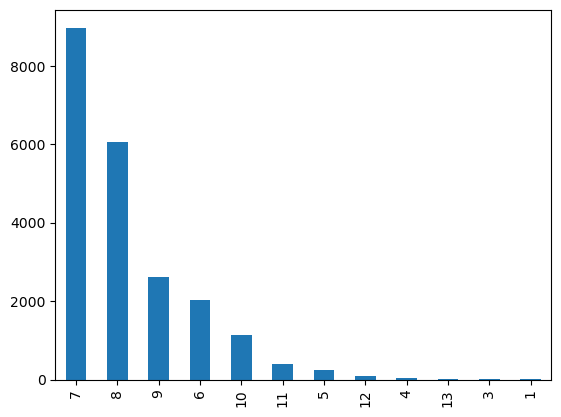

In [10]:
count = df['grade']
count.value_counts().plot(kind='bar');